## Leyendo data preparada

In [1]:
import geopandas as gpd

link="https://github.com/chorrillos/spatial/raw/main/WorldMapDemo.gpkg"
WorldDemo=gpd.read_file(link)

## Analisis de variables

In [2]:
WorldDemo.iloc[:,11:].describe()

2006        2008        2010        2011        2012        2013  \
count  167.000000  167.000000  167.000000  167.000000  167.000000  167.000000   
mean     5.519281    5.547665    5.462335    5.490539    5.519401    5.534132   
std      2.257950    2.245873    2.227067    2.179199    2.189409    2.191709   
min      1.030000    0.860000    1.080000    1.080000    1.080000    1.080000   
25%      3.470000    3.490000    3.425000    3.535000    3.580000    3.555000   
50%      5.890000    5.850000    5.860000    5.840000    5.860000    5.860000   
75%      7.375000    7.355000    7.215000    7.190000    7.200000    7.265000   
max      9.880000    9.880000    9.800000    9.800000    9.930000    9.930000   

             2014        2015        2016        2017        2018        2019  \
count  167.000000  167.000000  167.000000  167.000000  167.000000  167.000000   
mean     5.548024    5.552994    5.520060    5.475449    5.478563    5.438982   
std      2.176814    2.194571    2.196616    2.188561    2.199400    2.241169   
min      1.080000    1.080000    1.080000    1.080000    1.080000    1.080000   
25%      3.610000    3.685000    3.580000    3.615000    3.545000    3.370000   
50%      5.790000    5.840000    5.730000    5.690000    5.690000    5.650000   
75%      7.395000    7.330000    7.265000    7.210000    7.175000    7.165000   
max      9.930000    9.930000    9.930000    9.870000    9.870000    9.870000   

             2020        2021  electoralprocessandpluralism  \
count  167.000000  167.000000                    167.000000   
mean     5.369760    5.281377                      5.630599   
std      2.252275    2.314036                      3.825036   
min      1.080000    0.320000                      0.000000   
25%      3.265000    3.210000                      1.460000   
50%      5.710000    5.610000                      7.000000   
75%      7.130000    7.095000                      9.170000   
max      9.810000    9.750000                     10.000000   

       functioningofgovernment  politicalparticipation  politicalculture  \
count               167.000000              167.000000        167.000000   
mean                  4.642216                5.385629          5.399042   
std                   2.575207                1.962253          1.829874   
min                   0.000000                0.000000          1.250000   
25%                   2.710000                3.890000          4.065000   
50%                   5.000000                5.560000          5.630000   
75%                   6.430000                6.670000          6.250000   
max                   9.640000               10.000000         10.000000   

       civilliberties  
count      167.000000  
mean         5.375090  
std          2.711683  
min          0.000000  
25%          3.240000  
50%          5.590000  
75%          7.650000  
max          9.710000

<AxesSubplot:>

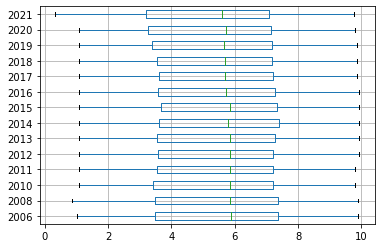

In [3]:
WorldDemo.iloc[:,11:26].boxplot(vert=False)

<AxesSubplot:>

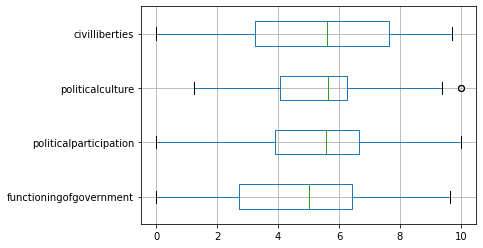

In [4]:
WorldDemo.iloc[:,27:].boxplot(vert=False)

array([[<AxesSubplot:title={'center':'2006'}>,
        <AxesSubplot:title={'center':'2008'}>,
        <AxesSubplot:title={'center':'2010'}>,
        <AxesSubplot:title={'center':'2011'}>],
       [<AxesSubplot:title={'center':'2012'}>,
        <AxesSubplot:title={'center':'2013'}>,
        <AxesSubplot:title={'center':'2014'}>,
        <AxesSubplot:title={'center':'2015'}>],
       [<AxesSubplot:title={'center':'2016'}>,
        <AxesSubplot:title={'center':'2017'}>,
        <AxesSubplot:title={'center':'2018'}>,
        <AxesSubplot:title={'center':'2019'}>],
       [<AxesSubplot:title={'center':'2020'}>,
        <AxesSubplot:title={'center':'2021'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

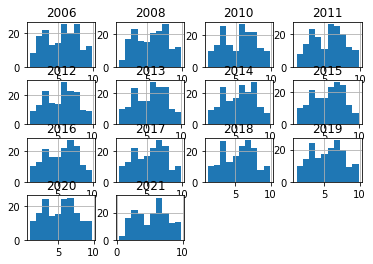

In [5]:
WorldDemo.iloc[:,11:26].hist()

array([[<AxesSubplot:title={'center':'functioningofgovernment'}>,
        <AxesSubplot:title={'center':'politicalparticipation'}>],
       [<AxesSubplot:title={'center':'politicalculture'}>,
        <AxesSubplot:title={'center':'civilliberties'}>]], dtype=object)

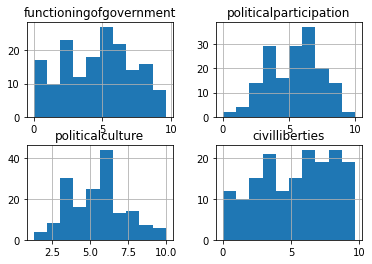

In [6]:
WorldDemo.iloc[:,27:].hist()

## Coropletico:

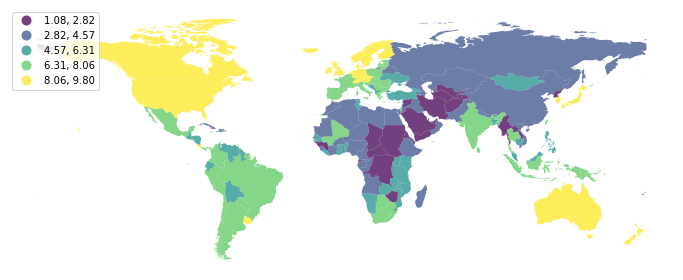

In [7]:
import matplotlib.pyplot as plt  # Graphics
f, ax = plt.subplots(1, figsize=(12, 12))
WorldDemo.plot(column='2011', 
        cmap='viridis', 
        scheme='equal_interval',
        k=5, 
        edgecolor='white', 
        linewidth=0., 
        alpha=0.75, 
        legend=True,
        legend_kwds=dict(loc=2),
        ax=ax
       )

ax.set_axis_off()

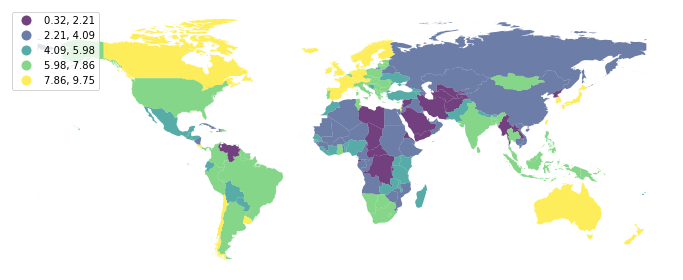

In [8]:
import matplotlib.pyplot as plt  # Graphics
f, ax = plt.subplots(1, figsize=(12, 12))
WorldDemo.plot(column='2021', 
        cmap='viridis', 
        scheme='equal_interval',
        k=5, 
        edgecolor='white', 
        linewidth=0., 
        alpha=0.75, 
        legend=True,
        legend_kwds=dict(loc=2),
        ax=ax
       )

ax.set_axis_off()

## Analisis Espacial 

In [9]:
from pysal.lib import weights
wKNN=weights.distance.KNN.from_dataframe(WorldDemo, k=8)

/Users/JoseManuel/opt/anaconda3/envs/spatial/lib/python3.8/site-packages/libpysal/weights/util.py:1073: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  data = np.vstack([np.array(shape.centroid) for shape in first_choice])
/Users/JoseManuel/opt/anaconda3/envs/spatial/lib/python3.8/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
  warnings.warn(message)


In [10]:
# vecindad será valor entre 0 y 1
wKNN.transform = 'R'

In [11]:
from esda.moran import Moran

moran2011 = Moran(WorldDemo['2011'], wKNN)
moran2011.I,moran2011.p_sim

(0.5125682150496321, 0.001)

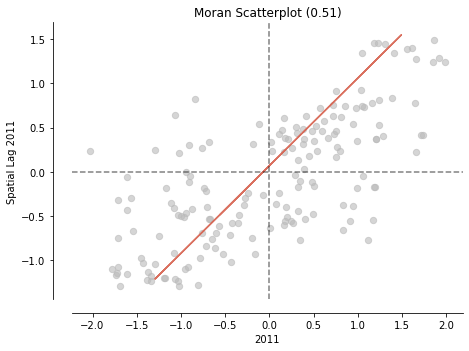

In [12]:
from splot.esda import moran_scatterplot
fig, ax = moran_scatterplot(moran2011, aspect_equal=True)
ax.set_xlabel('2011')
ax.set_ylabel('Spatial Lag 2011')
plt.show()

In [13]:
moran2021 = Moran(WorldDemo['2021'], wKNN)
moran2021.I,moran2021.p_sim

(0.46826825792224247, 0.001)

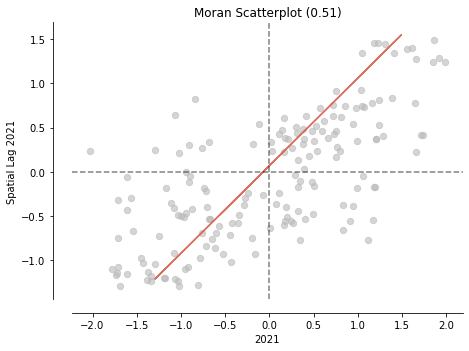

In [14]:
from splot.esda import moran_scatterplot
fig, ax = moran_scatterplot(moran2011, aspect_equal=True)
ax.set_xlabel('2021')
ax.set_ylabel('Spatial Lag 2021')
plt.show()

### Coeficiente de correlación local

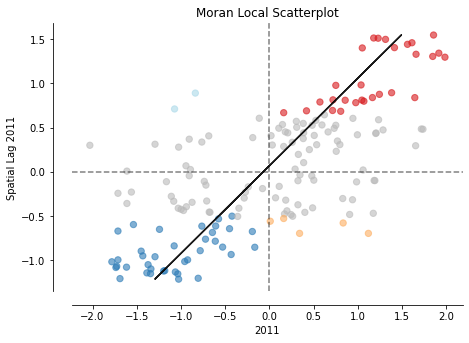

In [15]:
from esda.moran import Moran_Local

# calculate Moran_Local and plot
lisa2011 = Moran_Local(y=WorldDemo['2011'], w=wKNN,seed=2022)
fig, ax = moran_scatterplot(lisa2011,p=0.05)
ax.set_xlabel('2011')
ax.set_ylabel('Spatial Lag 2011')
plt.show()

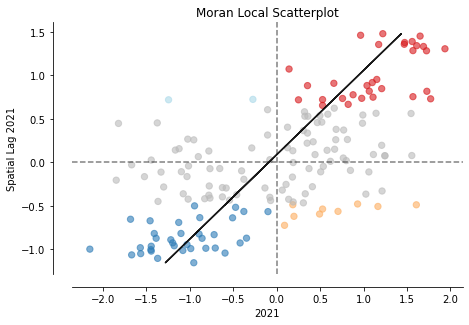

In [16]:
# calculate Moran_Local and plot
lisa2021 = Moran_Local(y=WorldDemo['2021'], w=wKNN,seed=2022)
fig, ax = moran_scatterplot(lisa2021,p=0.05)
ax.set_xlabel('2021')
ax.set_ylabel('Spatial Lag 2021')
plt.show()

### LISA por cuadrante

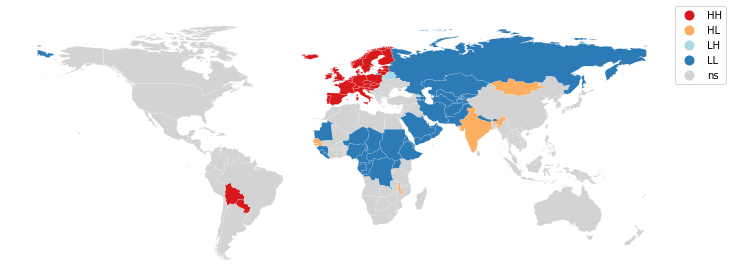

In [17]:
from splot.esda import lisa_cluster
f, ax = plt.subplots(1, figsize=(12, 12))
fig = lisa_cluster(lisa2011, 
                   WorldDemo,ax=ax,
                   legend_kwds={'loc': 'upper left', 
                                'bbox_to_anchor': (0.99, 1.05)})
plt.show()

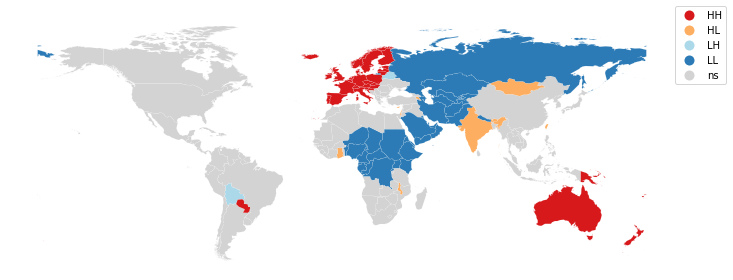

In [18]:
f, ax = plt.subplots(1, figsize=(12, 12))
fig = lisa_cluster(lisa2021, 
                   WorldDemo,ax=ax,
                   legend_kwds={'loc': 'upper left', 
                                'bbox_to_anchor': (0.99, 1.05)})
plt.show()

In [19]:
from esda.moran import Moran_Local_BV

lisa2021_2011_bv = Moran_Local_BV(WorldDemo['2021'], 
                                  WorldDemo['2011'], 
                                  wKNN)

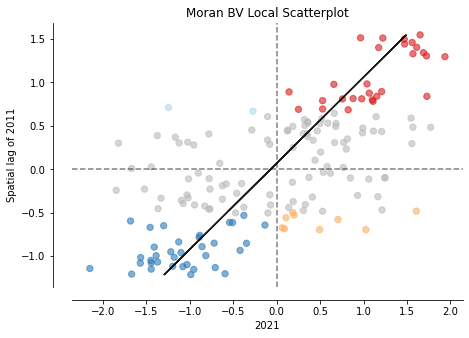

In [20]:
fig, ax = moran_scatterplot(lisa2021_2011_bv, p=0.05)
ax.set_xlabel('2021')
ax.set_ylabel('Spatial lag of 2011')
plt.show()

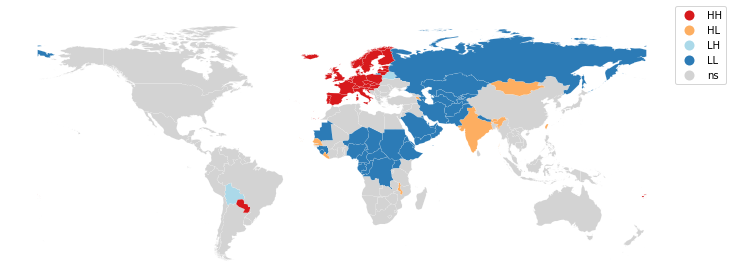

In [21]:
f, ax = plt.subplots(1, figsize=(12, 12))
fig = lisa_cluster(lisa2021_2011_bv, 
                   WorldDemo,ax=ax,
                   legend_kwds={'loc': 'upper left', 
                                'bbox_to_anchor': (0.99, 1.05)})
plt.show()

In [22]:
WorldDemo.columns

Index(['FIPS', 'ISO2', 'ISO3', 'UN', 'NAME', 'AREA', 'POP2005', 'REGION',
       'SUBREGION', 'LON', 'LAT', 'country', '2006', '2008', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020',
       '2021', 'electoralprocessandpluralism', 'functioningofgovernment',
       'politicalparticipation', 'politicalculture', 'civilliberties',
       'geometry'],
      dtype='object')

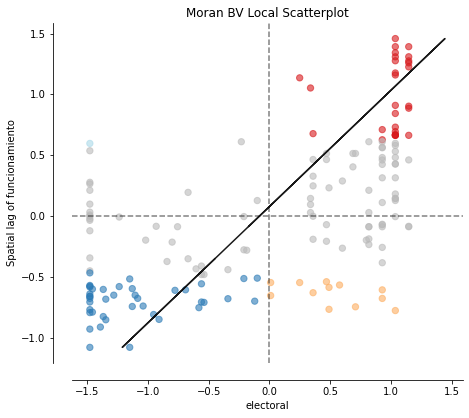

In [23]:
lisa_elec_func_bv = Moran_Local_BV(WorldDemo['electoralprocessandpluralism'], 
                                  WorldDemo['functioningofgovernment'], 
                                  wKNN)

fig, ax = moran_scatterplot(lisa_elec_func_bv, p=0.05)
ax.set_xlabel('electoral')
ax.set_ylabel('Spatial lag of funcionamiento')
plt.show()

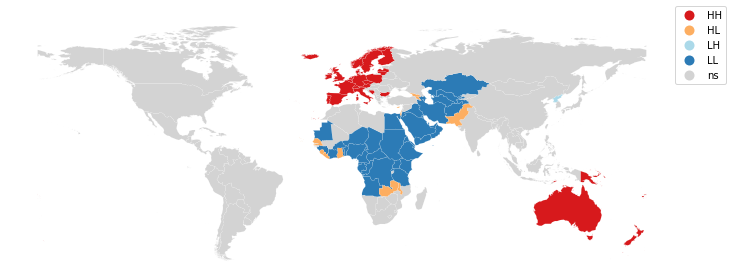

In [24]:
f, ax = plt.subplots(1, figsize=(12, 12))
fig = lisa_cluster(lisa_elec_func_bv, 
                   WorldDemo,ax=ax,
                   legend_kwds={'loc': 'upper left', 
                                'bbox_to_anchor': (0.99, 1.05)})
plt.show()